## Exercise 1: Implement the Logistic Function

In the following, implement the logistic function for binary classification.

/var/folders/xr/kt3mj1zd5q301hfqvry58zt5q2b8fk/T/ipykernel_674/3549831332.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


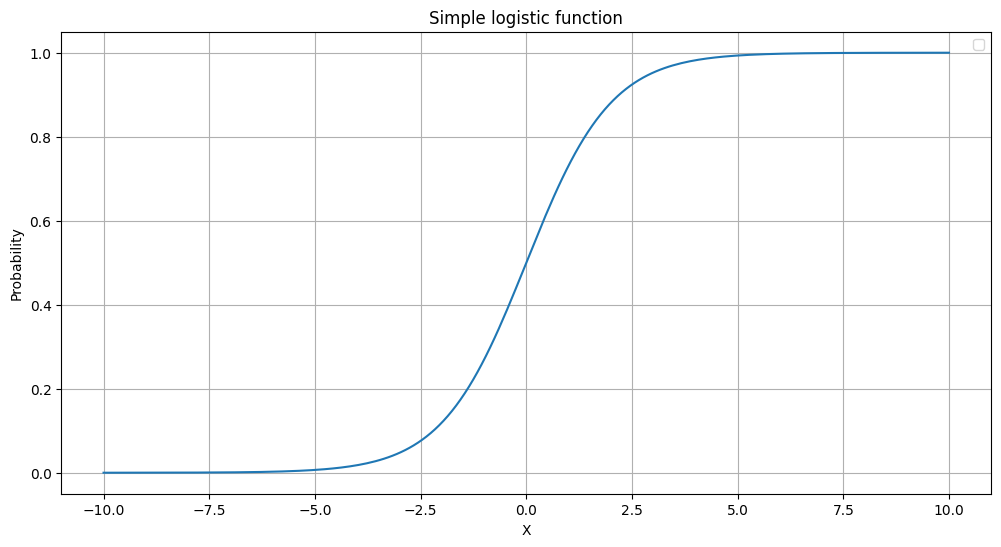

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(X):
    #YOUR CODE HERE
    return 1 / (1 + np.exp(-x))


# Graph 1: Modifying alpha (intercept term)
x = np.linspace(-10, 10, 200)  # Generate 200 points between -10 and 10
alphas = [-5, 0, 5]  # Different values of alpha to shift the curve

plt.figure(figsize=(12, 6))
plt.plot(x, logistic_function(x))
plt.title('Simple logistic function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 2: Create a Logistic Regression class

Use the logistic function above to derive the probabilities inside the `fit` function

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X, y = check_X_y(X, y, ensure_2d=True)
        n_samples, n_features = X.shape

        # Initialize parameters
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = self._predict_proba(X)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

            # Check for convergence
            if np.all(np.abs(self.learning_rate * dw) < self.tolerance):
                break

        return self

    def _predict_proba(self, X):
        linear_pred = np.dot(X, self.coef_) + self.intercept_
        return sigmoid(linear_pred)

    def predict_proba(self, X):
        X = check_array(X, ensure_2d=True)
        return self._predict_proba(X)

    def predict(self, X):
        X = check_array(X, ensure_2d=True)
        return (self._predict_proba(X) >= 0.5).astype(int)

    def _compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    




## Exercise 3: Implement Softmax

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    # Your code here
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Example of how softmax works
example_z = np.array([[1.0, 2.0, 0.5], [-1.0, 0.0, 3.0]])
example_softmax = softmax(example_z)
print("\nSoftmax example:")
print("Input:")
print(example_z)
print("Softmax output:")
print(example_softmax)
print("Sum of probabilities for each row:")
print(np.sum(example_softmax, axis=1))

## Exercise 4: Implement Multiple Logistic Regression

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import LabelEncoder

def softmax(z):
    # Subtract max for numerical stability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.coef_ = None
        self.intercept_ = None
        self.classes_ = None
        self.n_classes_ = None
        self.label_encoder = None

    def fit(self, X, y):
        X, y = check_X_y(X, y, ensure_2d=True)
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_
        self.n_classes_ = len(self.classes_)

        n_samples, n_features = X.shape

        # Initialize parameters
        self.coef_ = np.zeros((self.n_classes_, n_features))
        self.intercept_ = np.zeros(self.n_classes_)

        # Convert y to one-hot encoding
        y_onehot = np.eye(self.n_classes_)[y_encoded]

        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = self._predict_proba(X)

            # Calculate gradients
            error = y_pred - y_onehot
            dw = (1 / n_samples) * np.dot(X.T, error).T
            db = (1 / n_samples) * np.sum(error, axis=0)

            # Update parameters
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

            # Check for convergence
            if np.all(np.abs(self.learning_rate * dw) < self.tolerance):
                break

        return self

    def _predict_proba(self, X):
        linear_pred = np.dot(X, self.coef_.T) + self.intercept_
        return softmax(linear_pred)

    def predict_proba(self, X):
        X = check_array(X, ensure_2d=True)
        return self._predict_proba(X)

    def predict(self, X):
        X = check_array(X, ensure_2d=True)
        y_pred = np.argmax(self._predict_proba(X), axis=1)
        return self.label_encoder.inverse_transform(y_pred)

    def _compute_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-10), axis=1))